In [180]:
import scipy
import numpy
import pandas
import matplotlib
import sklearn
import csv
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split,KFold, LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion

In [68]:
print('scipy: %s' % scipy.__version__)
print('numpy: %s' % numpy.__version__)
print('matplotlib: %s' % matplotlib.__version__)
print('pandas: %s' % pandas.__version__)

scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.2.2
pandas: 1.0.5


In [15]:
mylist1 = [[1, 2, 3], [3, 4, 6]]
myarray = numpy.array(mylist1)
print(myarray)
print(myarray.shape)

[[1 2 3]
 [3 4 6]]
(2, 3)


In [16]:
myarray = numpy.array([1, 2, 3])
rownames = ['a', 'b', 'c']
myseries = pandas.Series(myarray, index=rownames)
print(myseries)

a    1
b    2
c    3
dtype: int64


In [22]:
mydataframe = pandas.DataFrame({'col1':[1,2,3], 'col2':[4,5,6]}, index=rownames)
mydataframe

,col1,col2
a,1,4
b,2,5
c,3,6


In [30]:
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(filename, names=names)

#Top 20 rows
peek = data.head(20)

#Data types
types = data.dtypes

#Is the data skewed?
class_counts = data.groupby('class').size()

#How are the variables correlated?
correlations = data.corr(method='pearson')

#Skew
skew = data.skew()

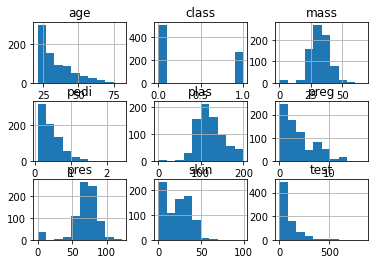

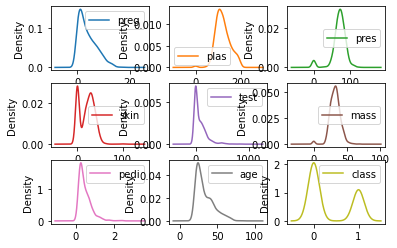

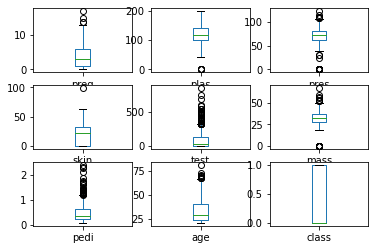

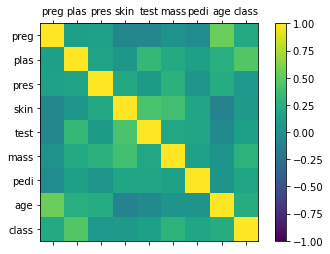

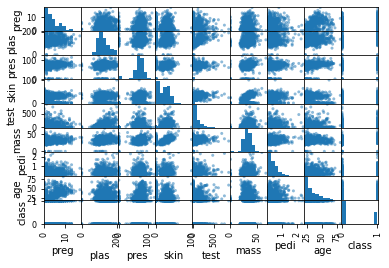

In [44]:
#Univariate histogram
data.hist()

#KDE plot
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

#Box plot
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

#Correlation Matrix plot
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

#Scatter plot matrix
pandas.plotting.scatter_matrix(data)

matplotlib.pyplot.show()

In [58]:
array = data.values

#Separating input and output
X = array[:,0:8]
Y = array[:,8]

#Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

#Standardizing (mean 0, std 1)
scaler = StandardScaler().fit(rescaledX)
rescaledX = scaler.transform(rescaledX)

#Normalized data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

#Binarized data
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

#Peeking at scaled data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
print(normalizedX[0:5,:])
print(binaryX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]
[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [61]:
#Feature selection using ANOVA F-Value

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

#Ranking features by score
numpy.set_printoptions(precision=3)
print(fit.scores_)

#Select top 4 features
features = fit.transform(X)
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


In [77]:
#Feature selection using RFE
model1 = LogisticRegression(solver='liblinear')
rfe = RFE(model1, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


/Users/arvind/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [78]:
#Feature selection using PCA
pca = PCA(n_components=3)
fit = pca.fit(X)

print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [166]:
#Feature selection using Feature Importance
model2 = ExtraTreesClassifier(n_estimators=100, max_features=7)
model2.fit(X, Y)
print(model2.feature_importances_)

[0.101 0.287 0.092 0.066 0.069 0.142 0.105 0.139]


In [96]:
test_size = 0.33
seed = 7

In [154]:
#Validation Methods

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model1.fit(X_train, Y_train)
resulttt = model1.score(X_test, Y_test)
print("Test-train split Accuracy: %.3f%%" % (resulttt*100.0))

#K-folds Cross Validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
resultskf = cross_val_score(model1, X, Y, cv=kfold)
print("K-Folds Accuracy: %.3f%% (%.3f%%)" % (resultskf.mean()*100.0, resultskf.std()*100.0))

#Leave one out validation
loocv = LeaveOneOut()
resultsloo = cross_val_score(model1, X, Y, cv=loocv)
print("LOO Accuracy: %.3f%% (%.3f%%)" % (resultsloo.mean()*100.0, resultsloo.std()*100.0))

#Random Shuffle Validation
kfold = ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
resultsrs = cross_val_score(model, X, Y, cv=kfold)
print("Random Shuffle Accuracy: %.3f%% (%.3f%%)" % (resultsrs.mean()*100.0, resultsrs.std()*100.0))

Test-train split Accuracy: 75.591%
K-Folds Accuracy: 77.086% (5.091%)
LOO Accuracy: 76.823% (42.196%)
Random Shuffle Accuracy: 74.843% (1.972%)


In [118]:
#Classification performance metrics

#Accuracy
resultsacc = cross_val_score(model1, X, Y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (resultsacc.mean(), resultsacc.std()))

#Log loss
resultsll = cross_val_score(model1, X, Y, cv=kfold, scoring='neg_log_loss')
print("Log Loss: %.3f (%.3f)" % (resultsll.mean(), resultsll.std()))

#Area under ROC curve
resultsroc = cross_val_score(model1, X, Y, cv=kfold, scoring='roc_auc')
print("Area under ROC: %.3f (%.3f)" % (resultsroc.mean(), resultsroc.std()))


predicted = model1.predict(X_test)

#Confusion Matrix
matrix = confusion_matrix(Y_test, predicted)
print("Confusion matrix:\n",matrix)

#Classification Report
report = classification_report(Y_test, predicted)
print("Classification report:\n", report)

Accuracy: 0.771 (0.051)
Log Loss: -0.494 (0.042)
Area under ROC: 0.826 (0.050)
Confusion matrix:
 [[141  21]
 [ 41  51]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



In [131]:
#Spot checking classification algorithms

#Logistic Regression

#Linear Discriminant Analysis
model3 = LinearDiscriminantAnalysis()
resultslda = cross_val_score(model, X, Y, cv=kfold)
print("LDA: ",resultslda.mean())

#K-Nearest Neighbors
model4 = KNeighborsClassifier()
resultsknn = cross_val_score(model4, X, Y, cv=kfold)
print("k-NN: ",resultsknn.mean())

#Naive Bayes
model5 = GaussianNB()
resultsnb = cross_val_score(model5, X, Y, cv=kfold)
print("Naive Bayes: ",resultsnb.mean())

#Decision Tree
model6 = DecisionTreeClassifier()
resultsdt = cross_val_score(model6, X, Y, cv=kfold)
print("Decision Tree: ",resultsdt.mean())

#SVM
model7 = SVC()
resultssvm = cross_val_score(model7, X, Y, cv=kfold)
print("SVM: ",resultssvm.mean())

LDA:  0.7437007874015749
k-NN:  0.7133858267716535
Naive Bayes:  0.7476377952755906
Decision Tree:  0.6826771653543305
SVM:  0.7484251968503937


LReg: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
k-NN: 0.710988 (0.050792)
DTree: 0.681152 (0.047449)
NBay: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


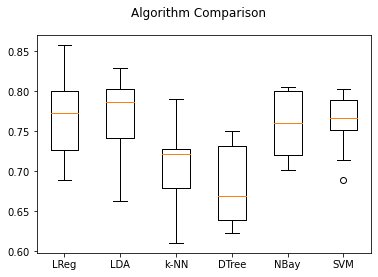

In [135]:
#Test Harness to visualize different methods
models = []
models.append(('LReg', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('NBay', GaussianNB()))
models.append(('SVM', SVC()))

#loop over models to store performance
results = []
names = []
for name, model in models:
  kf = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

#Boxplot performance comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [174]:
#Pipeline for pre-processing data using Standardization, PCA, Statistical Selection

#Feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

#Pipeline sequence
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('feature_union', feature_union))
estimators.append(('lda', LinearDiscriminantAnalysis()))

modelpl = Pipeline(estimators)
#Evaluating pipeline
resultspl = cross_val_score(modelpl, X, Y, cv=kfold)
print("Pipeline Steps: PCA + Statistical Feature Selection + Standardizing + LDA\n\nAccuracy: ",resultspl.mean())


Pipeline Steps: PCA + Statistical Feature Selection + Standardizing + LDA

Accuracy:  0.7633858267716536


In [173]:
#Ensembling techniques

#Bagged Decision Tree
cart = DecisionTreeClassifier()
model8 = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=seed)
resultbdt = cross_val_score(model8, X, Y, cv=kfold)
print("Ensemble Methods Accuracy:\n\nBagged Decision Tree: ",resultbdt.mean())

#Random Forest
model9 = RandomForestClassifier(n_estimators=100, max_features=3)
resultrf = cross_val_score(model9, X, Y, cv=kfold)
print("Random Forest: ",resultrf.mean())

#Extra Trees
resultet = cross_val_score(model2, X, Y, cv=kfold)
print("Extra Trees: ",resultet.mean())

#AdaBoost
model10 = AdaBoostClassifier(n_estimators=30, random_state=seed)
resultab = cross_val_score(model10, X, Y, cv=kfold)
print("AdaBoost: ",resultab.mean())

#Gradient Boosting Machine
model11 = GradientBoostingClassifier(n_estimators=100, random_state=seed)
resultgbm = cross_val_score(model11, X, Y, cv=kfold)
print("Gradient Boosting Machine: ",resultgbm.mean())

#Voting Ensemble

vestimators = []
modela = LogisticRegression(solver='liblinear')
vestimators.append(('logistic', modela))
modelb = DecisionTreeClassifier()
vestimators.append(('cart', modelb))
modelc = SVC(gamma='auto')
vestimators.append(('svm', modelc))

# create the ensemble model
ensemble = VotingClassifier(vestimators)
resultve = cross_val_score(ensemble, X, Y, cv=kfold)
print("Voting Ensemble: ",resultve.mean())

Ensemble Methods Accuracy:

Bagged Decision Tree:  0.7362204724409449
Random Forest:  0.7539370078740157
Extra Trees:  0.7503937007874016
AdaBoost:  0.7417322834645669
Gradient Boosting Machine:  0.75
Voting Ensemble:  0.7401574803149605


In [185]:
#Algorithm Tuning via Hyperparameter Optimization

#Grid Search Optimization
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grida = dict(alpha=alphas)
model12 = RidgeClassifier()
grid = GridSearchCV(estimator=model12, param_grid=param_grida, cv=3)
grid.fit(X, Y)
print("Grid Search for Ridge Classifier\nBest Score: ",grid.best_score_)
print("Best Alpha: ",grid.best_estimator_.alpha)

#Random Search Optimization
param_gridb = {'alpha': scipy.stats.uniform()}
rsearch = RandomizedSearchCV(estimator=model12, param_distributions=param_gridb, n_iter=100,
                             cv=3, random_state=7)
rsearch.fit(X, Y)
print("\nRandom Search for Ridge Classifier\nBest Score: ",rsearch.best_score_)
print("Best Alpha: ",rsearch.best_estimator_.alpha)

Grid Search for Ridge Classifier
Best Score:  0.7708333333333334
Best Alpha:  1.0

Random Search for Ridge Classifier
Best Score:  0.7708333333333334
Best Alpha:  0.07630828937395717
